In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import sys
from scipy.optimize import curve_fit
sys.path.append('../scripts')
from io import StringIO
from quantum_eraser_analysis import QuantumVisibilityCalculation
from plotting import f
f()

<h1> With Eraser

Processing angle: -10 degrees
Processing angle: 0 degrees
Processing angle: 9 degrees
Processing angle: 18 degrees
Processing angle: 27 degrees
Processing angle: 36 degrees
Processing angle: 45 degrees
Processing angle: 54 degrees
Processing angle: 63 degrees
Processing angle: 72 degrees
Processing angle: 81 degrees
Processing angle: 90 degrees
Processing angle: 100 degrees


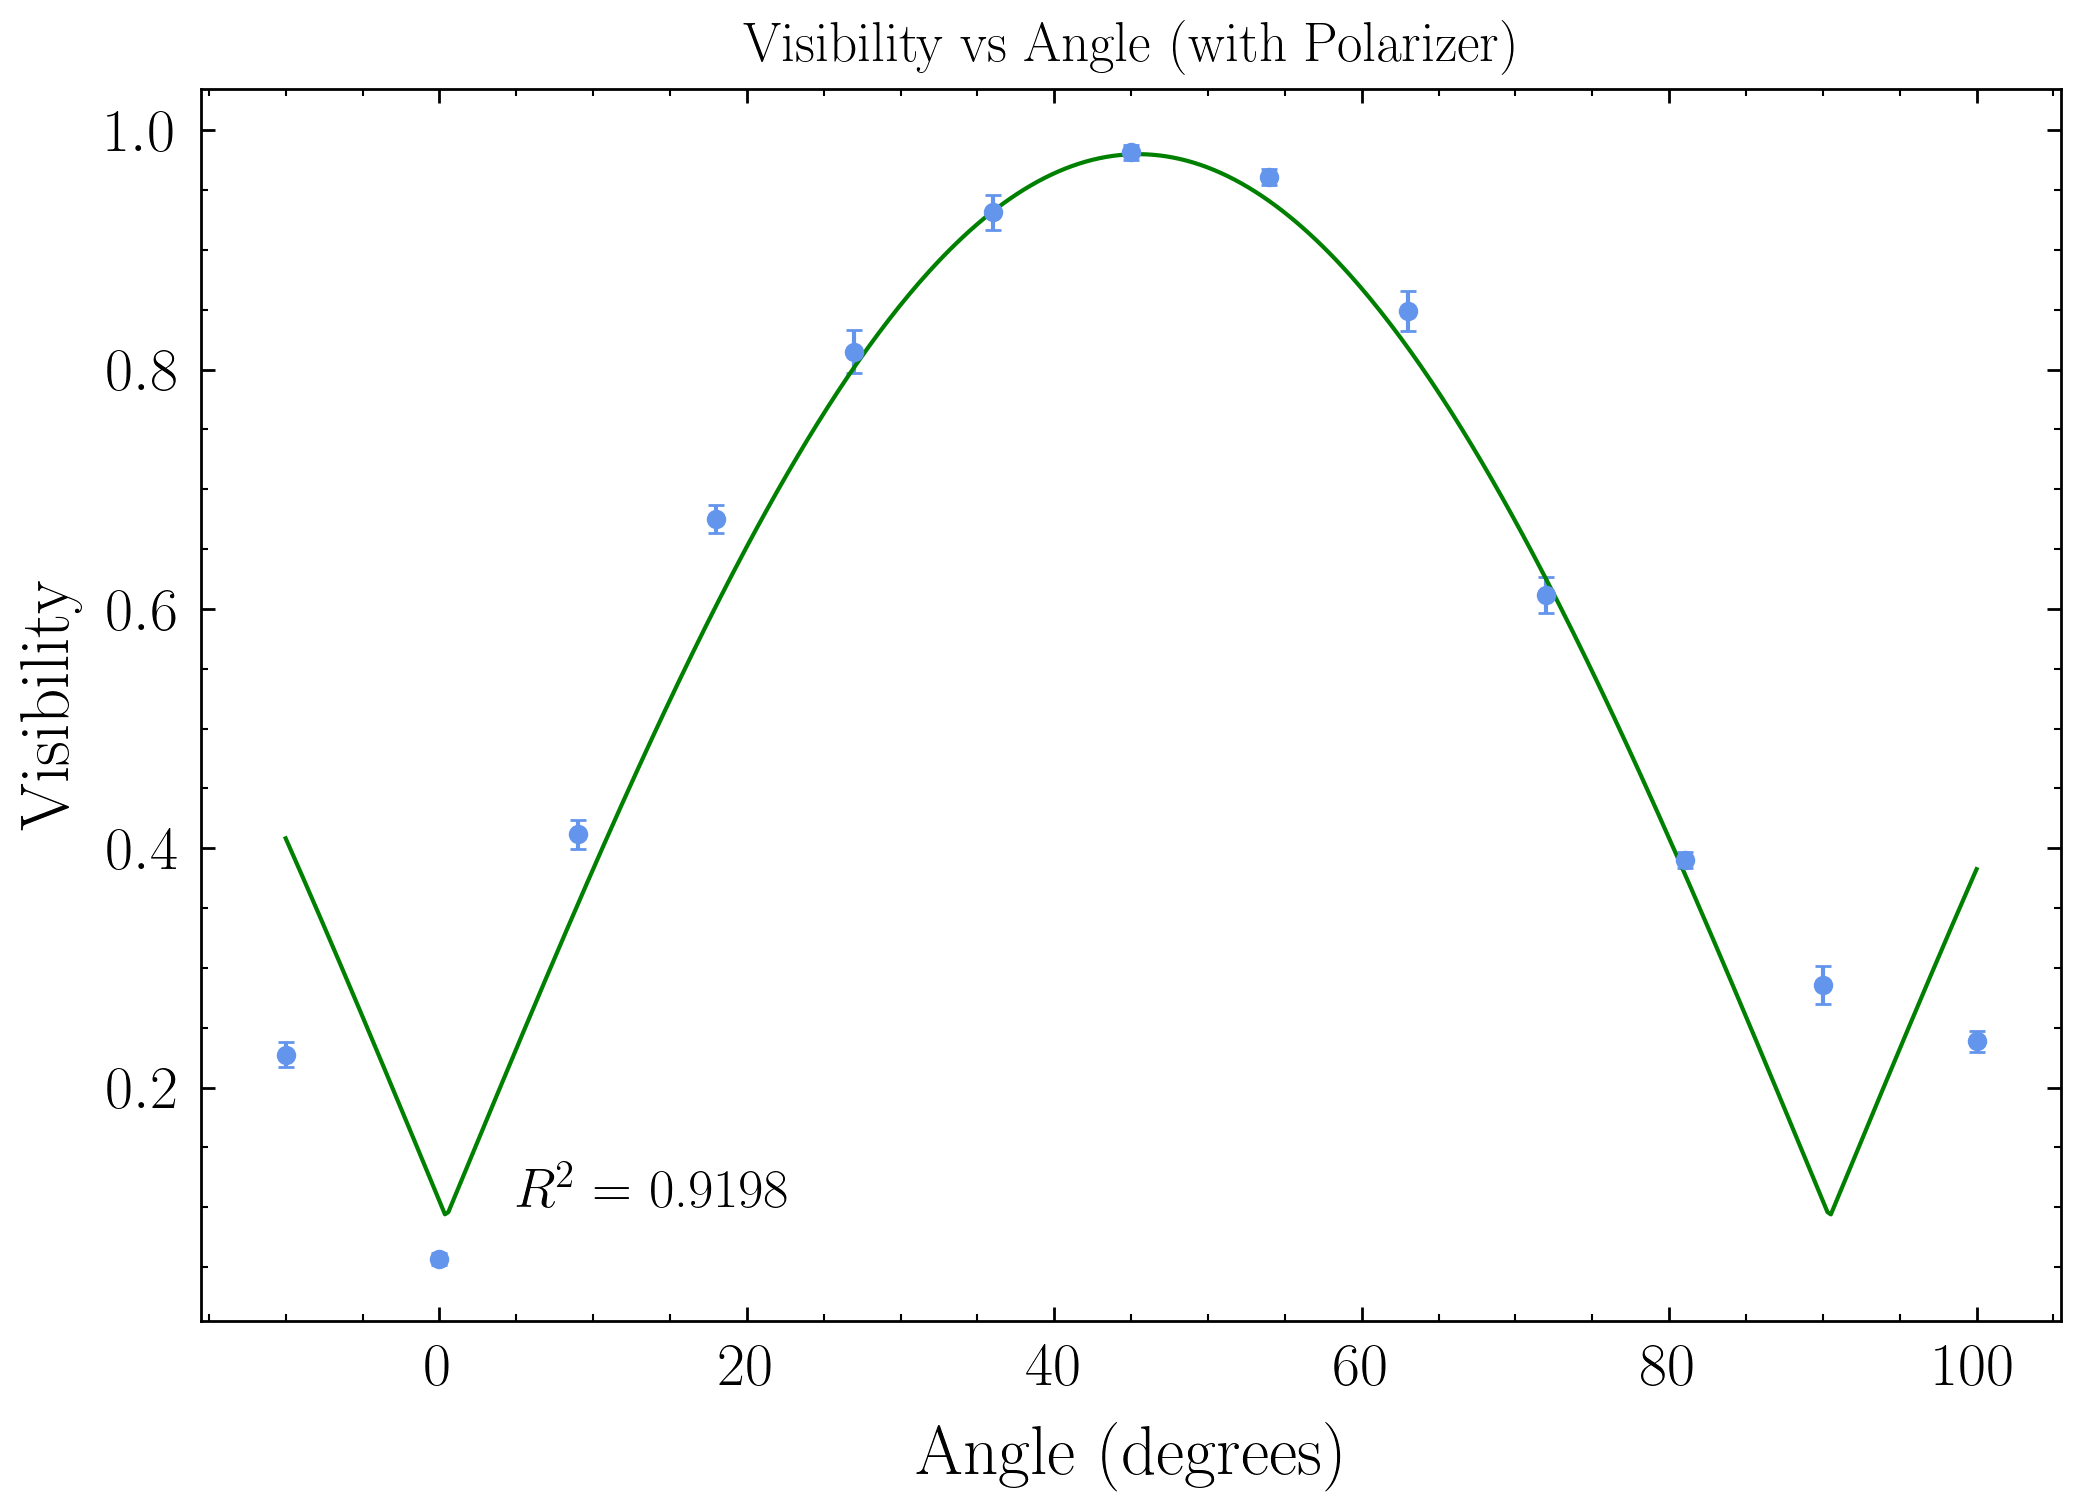

In [13]:
angles = [-10, 0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 100]
visibilities = []
std_visibilities = []
for angle in angles:
    print('Processing angle: {} degrees'.format(angle))
    file_name = '../data/Quantum data/Quantum Eraser/{}degrees.csv'.format(angle)
    qvc = QuantumVisibilityCalculation(file_name)
    qvc.calculate_visibility()
    visibilities.append(qvc.visibility)
    std_visibilities.append(qvc.visibility_error)
    
plt.errorbar(angles, visibilities, yerr=std_visibilities, fmt='o', label='Measured Visibilities')
def curve_analyse_eraser(x, a, b, c):
    return a * np.abs(np.sin(np.pi * x / 90 + c)) + b


popt, pcov = curve_fit(curve_analyse_eraser, angles, visibilities, p0=[1, 0, np.pi/10], maxfev=10000)

x_fit = np.linspace(-10, 100, 500)
plt.plot(x_fit, curve_analyse_eraser(x_fit, *popt), 'green')   
a_fit, b_fit, c_fit = popt
plt.xlabel('Angle (degrees)')
plt.ylabel('Visibility')
plt.title('Visibility vs Angle (with Polarizer)', fontsize=20)
residuals = visibilities - curve_analyse_eraser(np.array(angles), *popt)    
ss_res = np.sum(residuals**2)
ss_tot = np.sum((visibilities - np.mean(visibilities))**2)
r_squared = 1 - (ss_res / ss_tot)
plt.text(5, 0.1, f'$R^2$ = {r_squared:.4f}', fontsize=20)

plt.show()

<h1> Without Eraser

Processing angle: 0 degrees
Processing angle: 9 degrees
Processing angle: 18 degrees
Processing angle: 27 degrees
Processing angle: 36 degrees
Processing angle: 45 degrees
Processing angle: 54 degrees
Processing angle: 63 degrees
Processing angle: 72 degrees
Processing angle: 81 degrees
Processing angle: 90 degrees


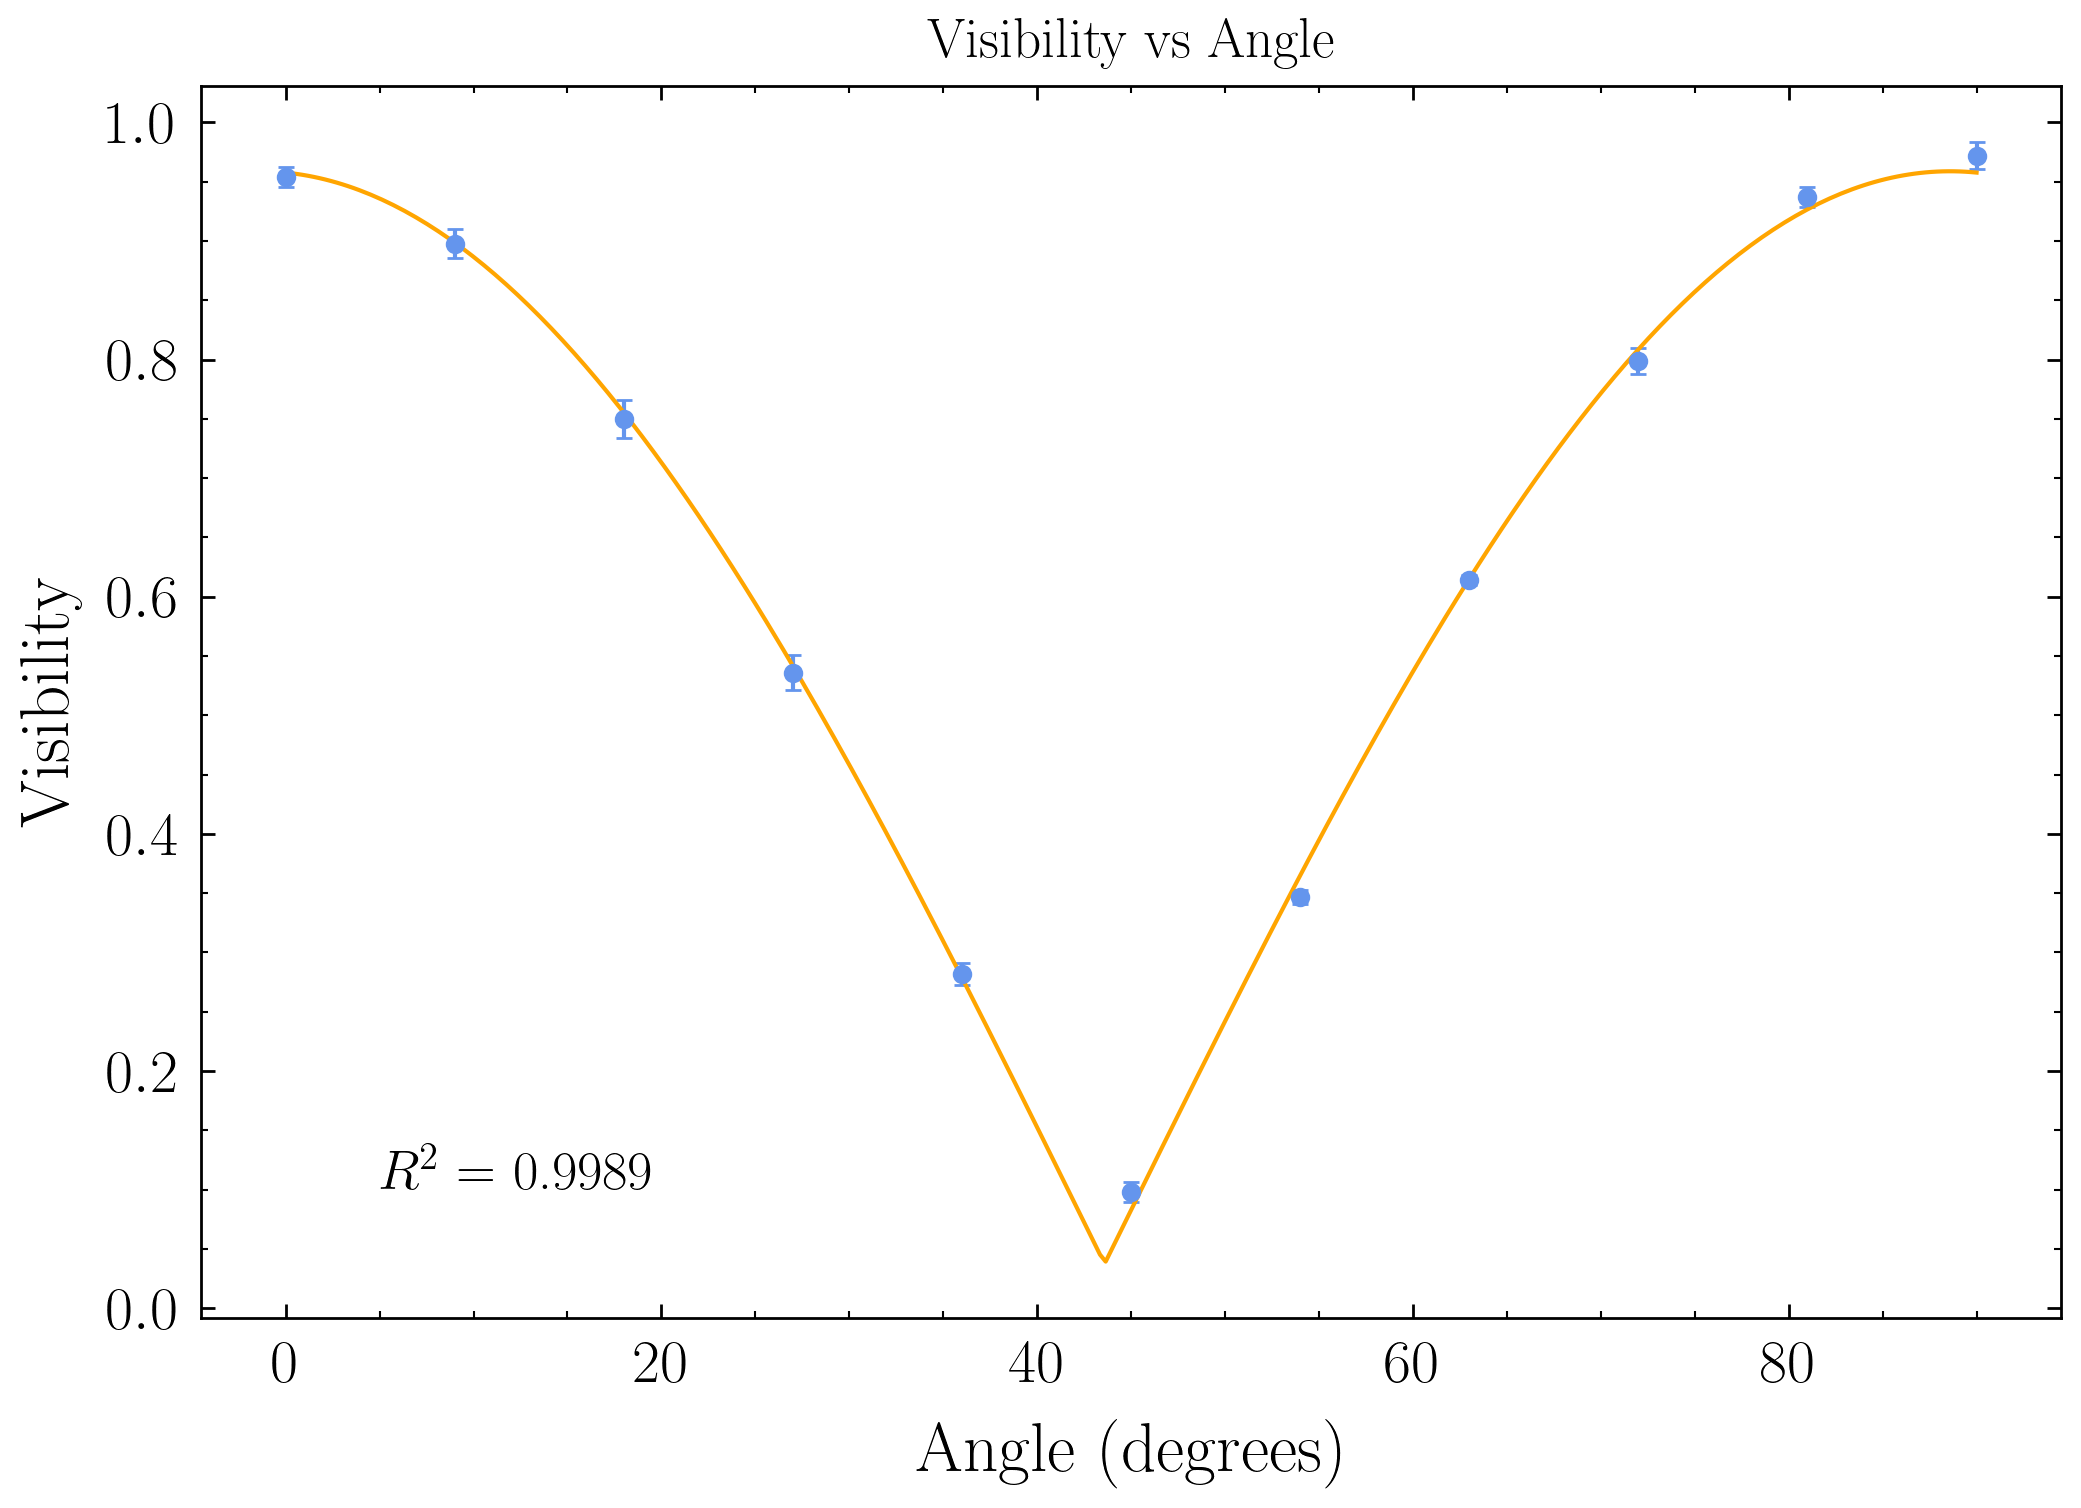

In [18]:
angles = [0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90]
visibilities = []
std_visibilities = []
for angle in angles:
    print('Processing angle: {} degrees'.format(angle))
    file_name = '../data/Quantum data/Quantum No Eraser/{}degrees.csv'.format(angle)
    qvc = QuantumVisibilityCalculation(file_name)
    qvc.calculate_visibility()
    visibilities.append(qvc.visibility)
    std_visibilities.append(qvc.visibility_error)
    
plt.errorbar(angles, visibilities, yerr=std_visibilities, fmt='o', label='Measured Visibilities')


def curve_analyse(x, a, b, c):
    return a * np.abs(np.cos(np.pi * x / 90 + c)) + b

popt, pcov = curve_fit(curve_analyse, angles, visibilities, p0=[1, 0, np.pi/10], maxfev=10000)
a_fit, b_fit, c_fit = popt

x_fit = np.linspace(0, 90, 300)
y_fit = curve_analyse(x_fit, *popt)

plt.plot(x_fit, y_fit, 'orange')
plt.xlabel('Angle (degrees)')
plt.ylabel('Visibility')
plt.title('Visibility vs Angle', fontsize=20)

residuals = visibilities - curve_analyse(np.array(angles), *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((visibilities - np.mean(visibilities))**2)
r_squared = 1 - (ss_res / ss_tot)
plt.text(5, 0.1, f'$R^2$ = {r_squared:.4f}', fontsize=20)

plt.show()
